In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def simpleCost(rho, v, b):
    I = v - rho*b
#     c = np.dot(I, np.conjugate(I))
    c = np.linalg.norm(I)**2
    if(np.imag(c) != 0):
        raise Exception("There exists an imaginary part")
    return np.real(c)

In [7]:
v = np.array([1 + 100j, 3 + 60j, -2 + 1j, 5 + 3j]) ## Constant
b = np.array([3 + 200j, 7 + 11j, 9 + 1j, 10 + 6j]) ## Constant

# v = np.array([0.2, 6, 99, 44]) ## Constant
# b = np.array([4, 7, 17, 20]) ## Constant

optRho = (np.dot(np.real(b), np.real(v)) + np.dot(np.imag(b), np.imag(v))) / np.dot(b, np.conjugate(b))
optRho += 1j * ((np.dot(np.imag(v), np.real(b)) - np.dot(np.real(v), np.imag(b))) / np.dot(b, np.conjugate(b)))
print(optRho)

(0.5132806891600862+0.01232764809268015j)


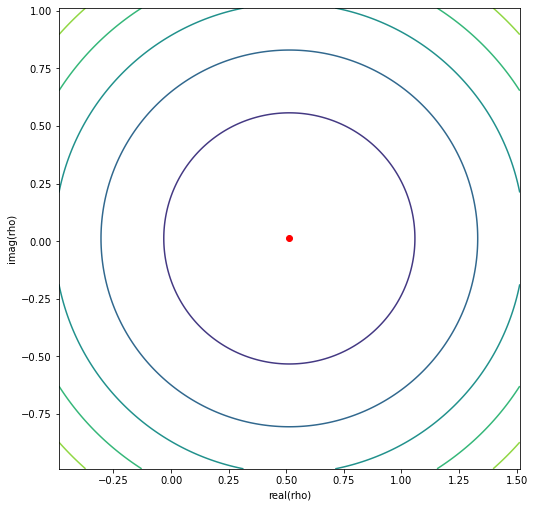

In [8]:
fig = plt.figure(figsize=(8,8))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
rhoRE = np.linspace(np.real(optRho) - 1, np.real(optRho) + 1, 200)
rhoIM = np.linspace(np.imag(optRho) - 1, np.imag(optRho) + 1, 200)
X, Y = np.meshgrid(rhoRE, rhoIM)
c = np.zeros((len(rhoIM), len(rhoRE)))
for i in range(len(rhoRE)):
    for j in range(len(rhoIM)):
        r = rhoRE[i] + 1j*rhoIM[j]
        c[j, i] = simpleCost(r, v, b)
# cf = axes.pcolormesh(X, Y, c, shading='auto')
# fig.colorbar(cf, ax=axes)
axes.contour(X, Y, c)
axes.set_xlabel('real(rho)')
axes.set_ylabel('imag(rho)')
axes.plot(np.real(optRho), np.imag(optRho), 'o', color='red')